In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [222]:
df = pd.read_csv('eda_data.csv')
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [224]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


-----

In [225]:
# EDA

In [226]:
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [227]:
# Compter les 'na' par colonne
na_count = (df == 'na').sum()
print("Nombre de 'na' par colonne:")
print(na_count)

# Total de 'na'
total_na = (df == 'na').sum().sum()
print(f"\nTotal de 'na' dans le dataset: {total_na}")

# Colonnes qui contiennent des 'na'
colonnes_avec_na = na_count[na_count > 0]
if len(colonnes_avec_na) > 0:
    print("\nColonnes contenant des 'na':")
    print(colonnes_avec_na)

Nombre de 'na' par colonne:
Unnamed: 0             0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_txt            0
job_state              0
same_state             0
age                    0
python_yn              0
R_yn                   0
spark                  0
aws                    0
excel                  0
job_simp             184
seniority            520
desc_len               0
num_comp               0
dtype: int64

Total de 'na' dans le dataset: 704

Colonnes contenant des 'na':
job_simp     184
seniority    520
dtype: int64


In [228]:
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nPremières lignes:")
print(df.head())
print(f"\nTypes de données:")
df.dtypes

Dimensions: 742 lignes × 33 colonnes

Premières lignes:
   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuque

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

       min_salary  max_salary  avg_salary
count  742.000000  742.000000  742.000000
mean    74.719677  128.149596  100.626011
std     30.980593   45.220324   38.855948
min     15.000000   16.000000   13.500000
25%     52.000000   96.000000   73.500000
50%     69.500000  124.000000   97.500000
75%     91.000000  155.000000  122.500000
max    202.000000  306.000000  254.000000


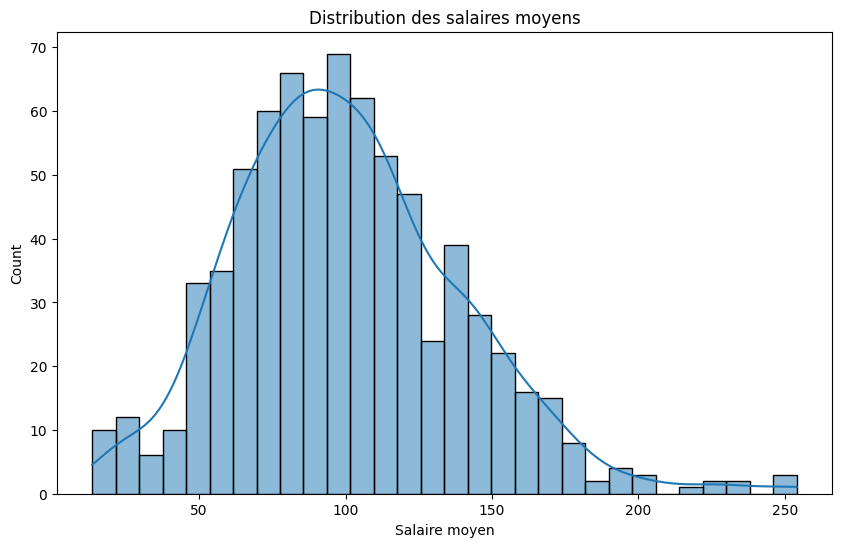

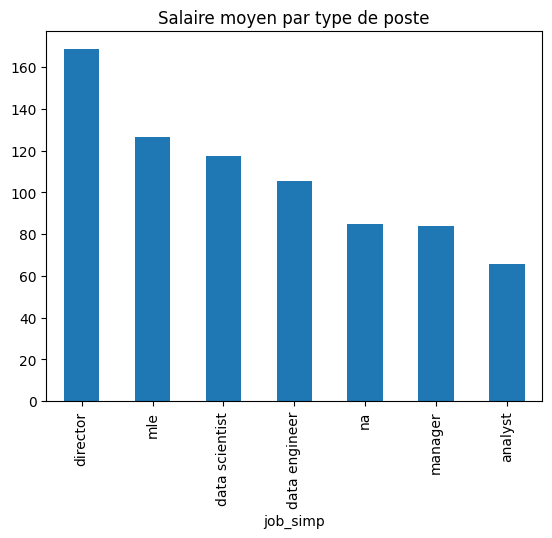

In [229]:
# Statistiques descriptives des salaires
print(df[['min_salary', 'max_salary', 'avg_salary']].describe())

# Distribution des salaires
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary'], bins=30, kde=True)
plt.title('Distribution des salaires moyens')
plt.xlabel('Salaire moyen')
plt.show()

# Salaires par type de job
df.groupby('job_simp')['avg_salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Salaire moyen par type de poste')
plt.show()

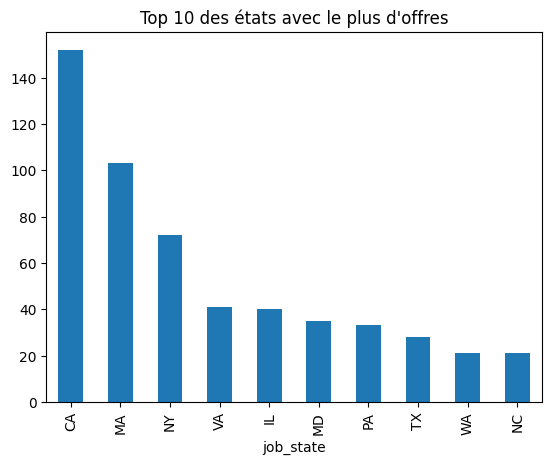

job_state
CA    123.513158
IL    116.662500
DC    110.181818
MA    106.281553
NJ    104.558824
MI    100.250000
RI    100.000000
NY     98.652778
NC     98.452381
MD     97.357143
Name: avg_salary, dtype: float64

In [230]:
# Top 10 des états avec le plus d'offres
df['job_state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des états avec le plus d\'offres')
plt.show()

# Salaire moyen par état
df.groupby('job_state')['avg_salary'].mean().sort_values(ascending=False).head(10)

In [231]:
# Demande de compétences
skills = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
skill_demand = df[skills].sum().sort_values(ascending=False)
print(skill_demand)

# Impact des compétences sur le salaire
for skill in skills:
    print(f"\nSalaire moyen avec {skill}:")
    print(df.groupby(skill)['avg_salary'].mean())

python_yn    392
excel        388
aws          176
spark        167
R_yn           2
dtype: int64

Salaire moyen avec python_yn:
python_yn
0     87.155714
1    112.653061
Name: avg_salary, dtype: float64

Salaire moyen avec R_yn:
R_yn
0    100.706757
1     70.750000
Name: avg_salary, dtype: float64

Salaire moyen avec spark:
spark
0     96.931304
1    113.347305
Name: avg_salary, dtype: float64

Salaire moyen avec aws:
aws
0     96.915194
1    112.559659
Name: avg_salary, dtype: float64

Salaire moyen avec excel:
excel
0    102.953390
1     98.502577
Name: avg_salary, dtype: float64


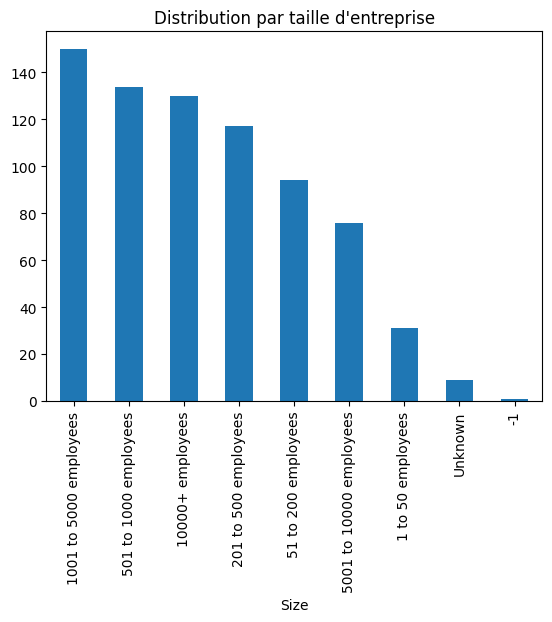

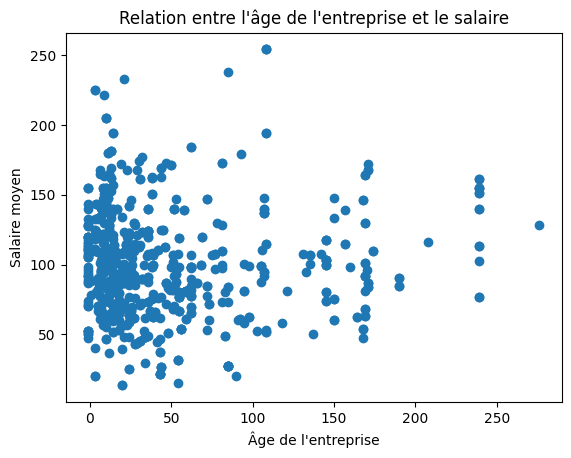

In [232]:
# Distribution des tailles d'entreprise
df['Size'].value_counts().plot(kind='bar')
plt.title('Distribution par taille d\'entreprise')
plt.show()

# Rating moyen par secteur
df.groupby('Sector')['Rating'].mean().sort_values(ascending=False).head(10)

# Âge des entreprises vs salaire
plt.scatter(df['age'], df['avg_salary'])
plt.xlabel('Âge de l\'entreprise')
plt.ylabel('Salaire moyen')
plt.title('Relation entre l\'âge de l\'entreprise et le salaire')
plt.show()

Valeurs 'na' par colonne:
job_simp     184
seniority    520
dtype: int64


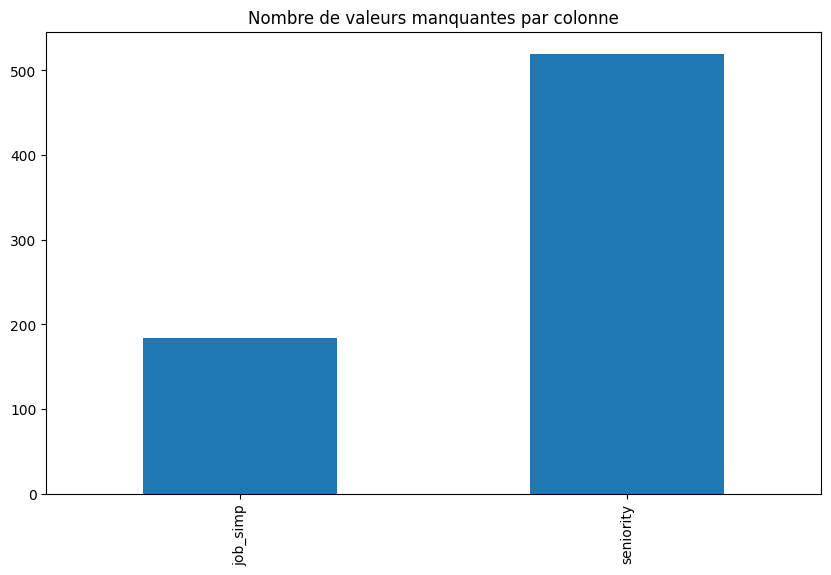

In [233]:
# Traiter les 'na'
na_count = (df == 'na').sum()
print("Valeurs 'na' par colonne:")
print(na_count[na_count > 0])

# Visualisation
plt.figure(figsize=(10, 6))
na_count[na_count > 0].plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.show()

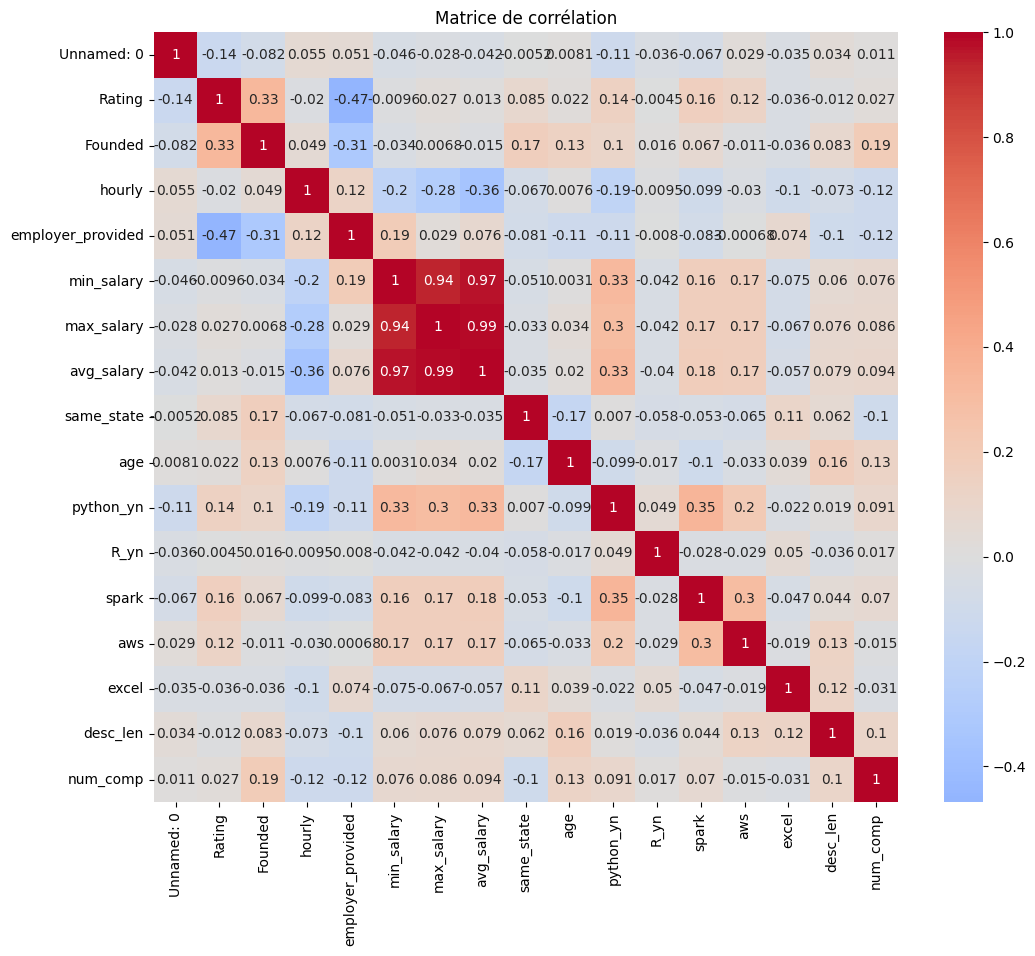

Corrélation avec le salaire moyen:
avg_salary           1.000000
max_salary           0.986862
min_salary           0.967765
python_yn            0.327796
spark                0.176559
aws                  0.171379
num_comp             0.093813
desc_len             0.078808
employer_provided    0.076287
age                  0.019655
Rating               0.013492
Founded             -0.015149
same_state          -0.034641
R_yn                -0.040000
Unnamed: 0          -0.041765
excel               -0.057252
hourly              -0.356082
Name: avg_salary, dtype: float64


In [234]:
# Matrice de corrélation pour les variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

# Corrélation avec le salaire
salary_corr = df[numeric_cols].corr()['avg_salary'].sort_values(ascending=False)
print("Corrélation avec le salaire moyen:")
print(salary_corr)

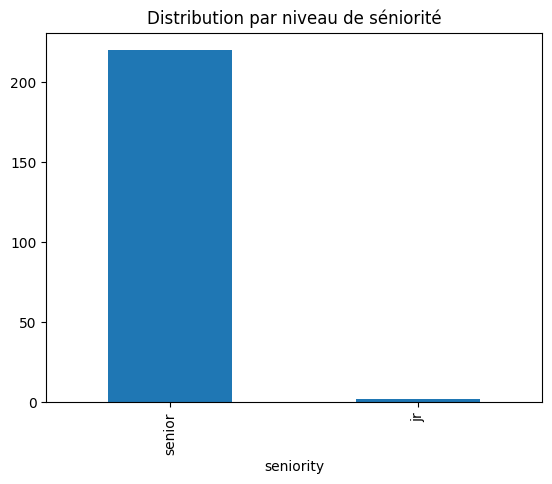

seniority
senior    121.563636
jr         81.500000
Name: avg_salary, dtype: float64

In [235]:
# Distribution par niveau de séniorité
df[df['seniority'] != 'na']['seniority'].value_counts().plot(kind='bar')
plt.title('Distribution par niveau de séniorité')
plt.show()

# Salaire par séniorité
df[df['seniority'] != 'na'].groupby('seniority')['avg_salary'].mean().sort_values(ascending=False)

<Axes: xlabel='Size', ylabel='avg_salary'>

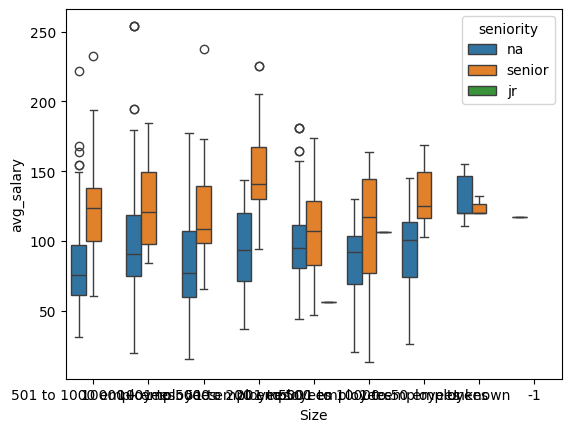

In [236]:
# Salaire par combinaison de compétences
df_skills = df.groupby(['python_yn', 'spark', 'aws'])['avg_salary'].mean()

# Interaction taille entreprise × séniorité × salaire
sns.boxplot(data=df, x='Size', y='avg_salary', hue='seniority')

In [237]:
# Impact du nombre de compétiteurs sur le salaire
df.groupby('num_comp')['avg_salary'].agg(['mean', 'count'])

,mean,count
num_comp,,
0,97.602174,460
1,106.208333,12
2,106.865854,41
3,105.504386,228
4,56.500000,1


<Axes: ylabel='avg_salary'>

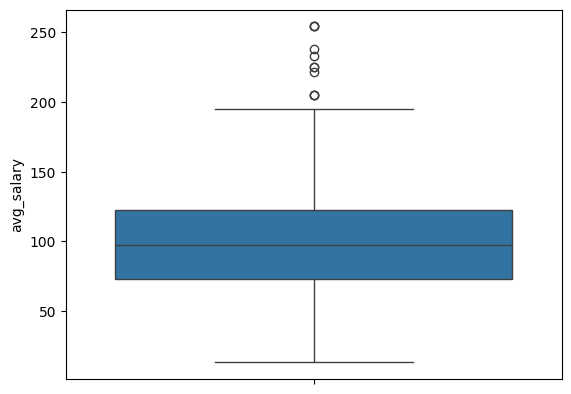

In [238]:
import seaborn as sns
sns.boxplot(df['avg_salary'])


In [239]:
Q1 = df['avg_salary'].quantile(0.25)
Q3 = df['avg_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

0.0 196.0


In [240]:
df = df[(df['avg_salary'] >= lower_bound) & (df['avg_salary'] <= upper_bound)]

In [241]:
# Analyse des postes les mieux payés
top_jobs = df.nlargest(20, 'avg_salary')

In [242]:
top_jobs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
410,410,"Director II, Data Science - GRS Predictive Ana...",$150K-$239K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,...,108,1,0,0,0,0,director,na,3935,3
616,616,"Director II, Data Science - GRS Predictive Ana...",$150K-$239K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,...,108,1,0,0,0,0,director,na,3935,3
507,507,Principal Data Scientist,$150K-$238K (Glassdoor est.),Position Overview\n\nThe Climate Corporation i...,3.2,The Climate Corporation\n3.2,"San Francisco, CA","San Francisco, CA",501 to 1000 employees,2006,...,14,0,0,0,1,1,data scientist,senior,4847,3
681,681,Principal Data Scientist,$150K-$238K (Glassdoor est.),Position Overview\n\nThe Climate Corporation i...,3.2,The Climate Corporation\n3.2,"San Francisco, CA","San Francisco, CA",501 to 1000 employees,2006,...,14,0,0,0,1,1,data scientist,senior,4847,3
46,46,Lead Data Scientist,$158K-$211K (Glassdoor est.),As the world's leader in digital payments tech...,3.7,Visa Inc.\n3.7,"Bellevue, WA","Foster City, CA",10000+ employees,1958,...,62,1,0,0,0,1,data scientist,senior,7286,3
473,473,Lead Data Scientist,$158K-$211K (Glassdoor est.),As the world's leader in digital payments tech...,3.7,Visa Inc.\n3.7,"Bellevue, WA","Foster City, CA",10000+ employees,1958,...,62,1,0,0,0,1,data scientist,senior,7286,3
193,193,Staff Machine Learning Engineer,$138K-$224K (Glassdoor est.),Join the Mobile Future with Tapjoy\n\nData Sci...,3.9,Tapjoy\n3.9,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2007,...,13,1,0,1,0,0,mle,na,2015,2
328,328,Staff Machine Learning Engineer,$138K-$224K (Glassdoor est.),Join the Mobile Future with Tapjoy\n\nData Sci...,3.9,Tapjoy\n3.9,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2007,...,13,1,0,1,0,0,mle,na,2015,2
471,471,Staff Machine Learning Engineer,$138K-$224K (Glassdoor est.),Join the Mobile Future with Tapjoy\n\nData Sci...,3.9,Tapjoy\n3.9,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2007,...,13,1,0,1,0,0,mle,na,2015,2
377,377,Lead Data Scientist,$139K-$221K (Glassdoor est.),Lead Data Scientist will lead specific client ...,3.9,Zest AI\n3.9,"Burbank, CA","Burbank, CA",51 to 200 employees,2009,...,11,1,0,0,0,1,data scientist,senior,3199,0


In [243]:
# DIAGRAMME DE SANKEY

# Filtrer pour avoir les top états, secteurs et jobs
df_sankey = df[(df['job_simp'] != 'na') & (df['Sector'] != 'Unknown / Non-Applicable')].copy()

# Sélectionner les top 8 états, 8 secteurs, et 6 types de jobs
top_states = df_sankey['job_state'].value_counts().head(8).index
top_sectors = df_sankey['Sector'].value_counts().head(8).index
top_jobs = df_sankey['job_simp'].value_counts().head(6).index

df_sankey_filtered = df_sankey[
    (df_sankey['job_state'].isin(top_states)) &
    (df_sankey['Sector'].isin(top_sectors)) &
    (df_sankey['job_simp'].isin(top_jobs))
]

In [244]:
df_sankey_filtered.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,15,1,0,1,1,1,data scientist,na,3804,0
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,11,1,0,1,0,0,data scientist,na,4574,2
11,11,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,52,0,0,0,0,0,data scientist,na,3490,0
13,13,Data Analyst,$46K-$85K (Glassdoor est.),"Are you an experienced Data Analyst, skilled a...",4.1,Yesler\n4.1,"Seattle, WA","Seattle, WA",201 to 500 employees,2012,...,8,1,0,1,1,1,analyst,na,4897,0


C:\Users\33619\AppData\Local\Temp\ipykernel_21388\2535828771.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="viridis")


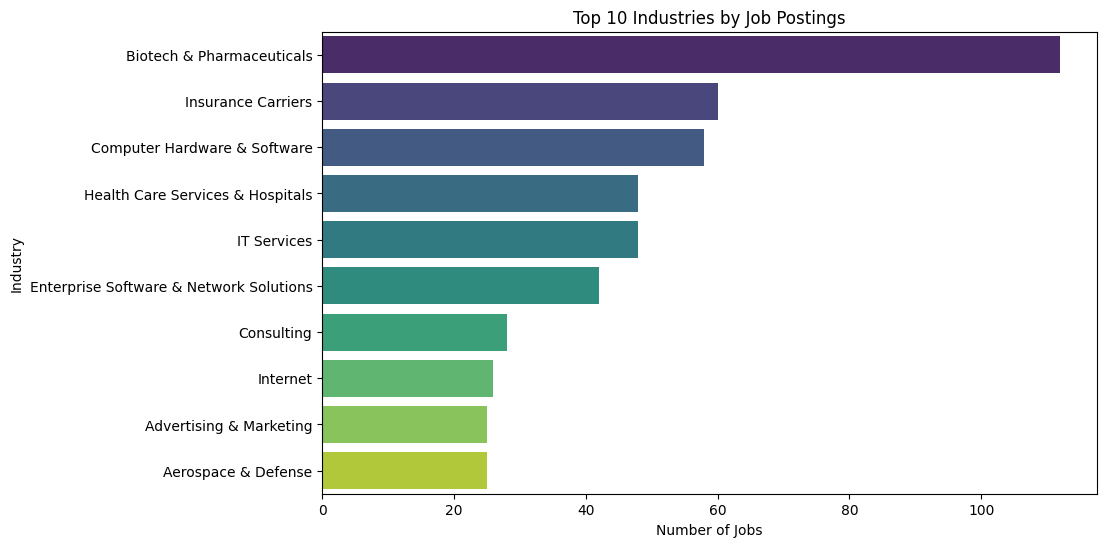

C:\Users\33619\AppData\Local\Temp\ipykernel_21388\2535828771.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_salary_industries.values, y=top_salary_industries.index, palette="magma")


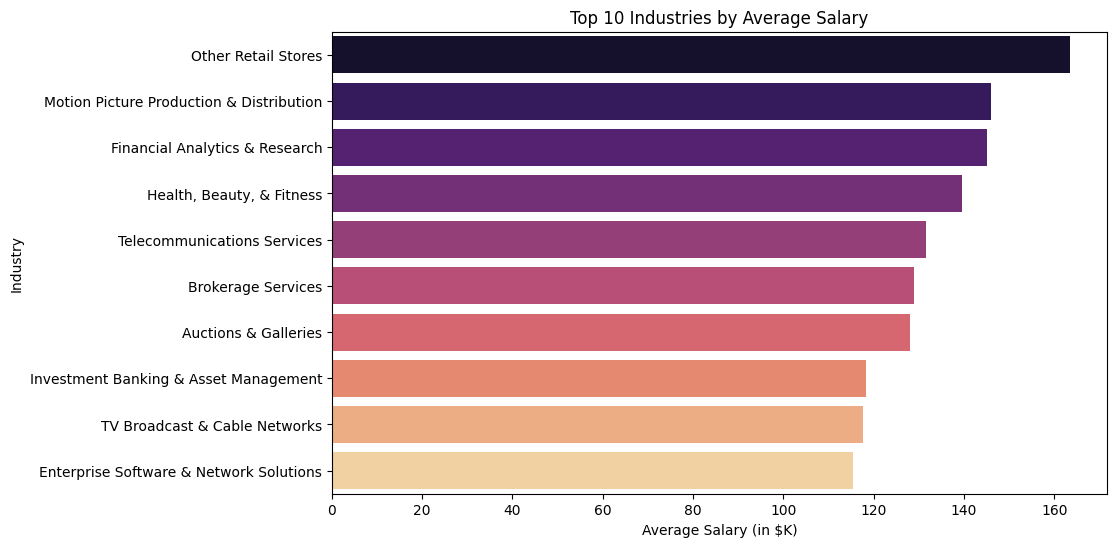

C:\Users\33619\AppData\Local\Temp\ipykernel_21388\2535828771.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="cubehelix")


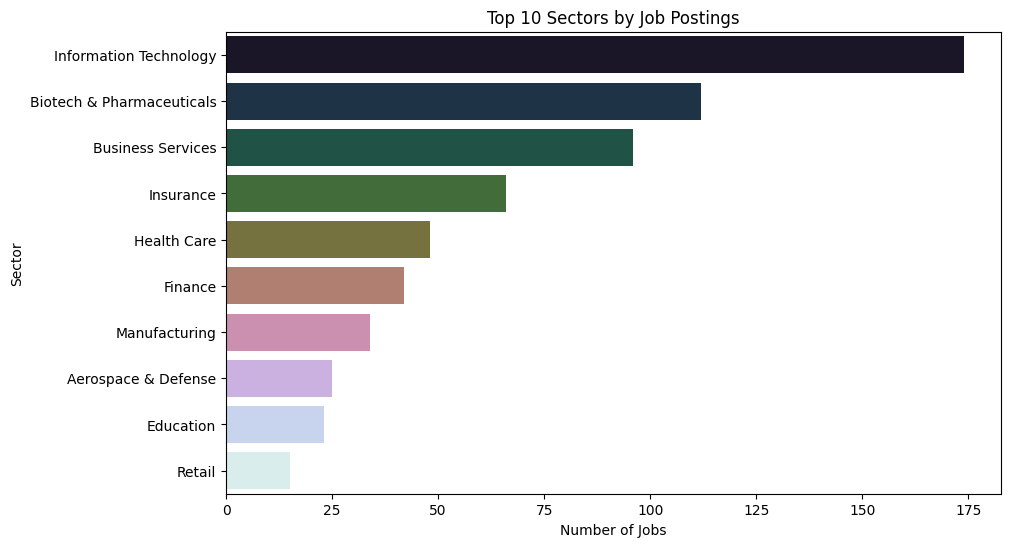

C:\Users\33619\AppData\Local\Temp\ipykernel_21388\2535828771.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_salary_sectors.values, y=top_salary_sectors.index, palette="coolwarm")


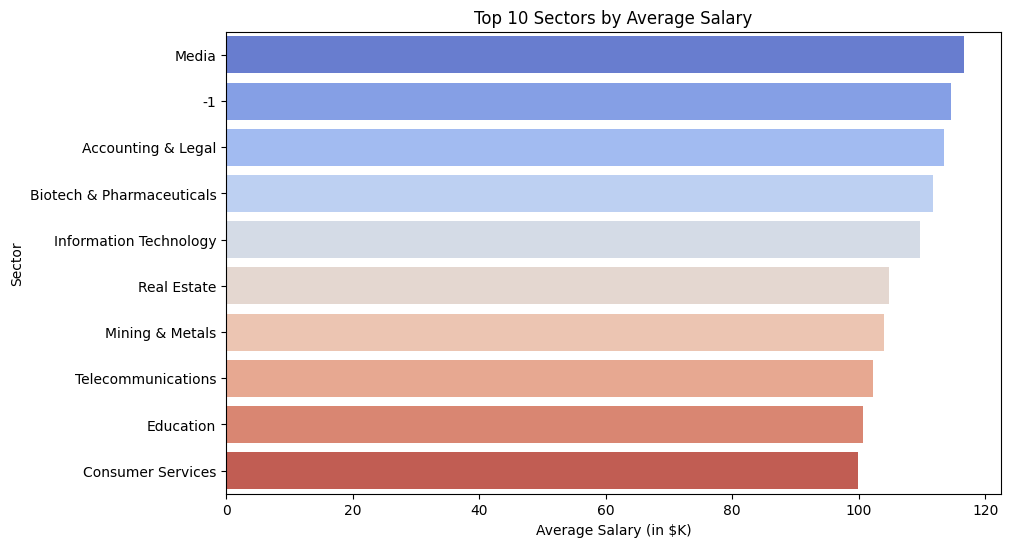

In [245]:
# Top 10 Industries by Number of Job Postings
top_industries = df['Industry'].value_counts().head(10)

# Top 10 Industries by Average Salary
top_salary_industries = df.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False).head(10)

# Top 10 Sectors by Number of Job Postings
top_sectors = df['Sector'].value_counts().head(10)

# Top 10 Sectors by Average Salary
top_salary_sectors = df.groupby('Sector')['avg_salary'].mean().sort_values(ascending=False).head(10)

# Visualization 1: Top Industries by Job Postings
plt.figure(figsize=(10,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="viridis")
plt.title("Top 10 Industries by Job Postings")
plt.xlabel("Number of Jobs")
plt.ylabel("Industry")
plt.show()

# Visualization 2: Top Industries by Average Salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_industries.values, y=top_salary_industries.index, palette="magma")
plt.title("Top 10 Industries by Average Salary")
plt.xlabel("Average Salary (in $K)")
plt.ylabel("Industry")
plt.show()

# Visualization 3: Top Sectors by Job Postings
plt.figure(figsize=(10,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="cubehelix")
plt.title("Top 10 Sectors by Job Postings")
plt.xlabel("Number of Jobs")
plt.ylabel("Sector")
plt.show()

# Visualization 4: Top Sectors by Average Salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_sectors.values, y=top_salary_sectors.index, palette="coolwarm")
plt.title("Top 10 Sectors by Average Salary")
plt.xlabel("Average Salary (in $K)")
plt.ylabel("Sector")
plt.show()

# CLeaning on the dataset

In [ ]:
# Drop useless columns
cols_to_drop = [
    "Unnamed: 0",          # only an index column created during CSV export
    "Salary Estimate",      # raw messy text like "$90K-$120K" we already have min/max/avg extracted
    "min_salary",           # redundant since target is avg_salary
    "max_salary",           # same reason
    "hourly",               # binary flag for hourly jobs, irrelevant/noisy for avg salary prediction
    "employer_provided",    # too sparse / not useful for salary inference
    "Company Name",         # we keep company_txt (cleaned version), so raw version is redundant
    "Competitors",          # messy text list, inconsistent, too noisy for prediction
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [247]:
# clean job dedscription bc the names are ugly bc of the scrapping
df["Job Description"] = (
    df["Job Description"]
        .str.replace('\n', ' ', regex=True)
        .str.replace('\r', ' ', regex=True)
        .str.replace('\xa0', ' ', regex=True)
        .str.replace('–', '-', regex=True)
        .str.strip()
)

In [248]:
# converting the size column to have range instead of strings 
df["size_min_employees"] = df["Size"].str.extract(r"(\d+)").astype(float)

df["size_max_employees"] = df["Size"].str.extract(r"to (\d+)")
df.loc[df["Size"].str.contains("\+"), "size_max_employees"] = df["size_min_employees"]  # handle "10000+ employees"

df["size_max_employees"] = df["size_max_employees"].astype(float)

df = df.drop(columns=["Size"])

<>:5: SyntaxWarning: invalid escape sequence '\+'
<>:5: SyntaxWarning: invalid escape sequence '\+'
C:\Users\33619\AppData\Local\Temp\ipykernel_21388\2561160025.py:5: SyntaxWarning: invalid escape sequence '\+'
  df.loc[df["Size"].str.contains("\+"), "size_max_employees"] = df["size_min_employees"]  # handle "10000+ employees"


In [249]:
#clean the revenue column
import re

def parse_revenue(value):
    if pd.isna(value):
        return (np.nan, np.nan)
    
    value = value.lower()
    
    # Cas "Unknown / Non-Applicable"
    if "unknown" in value or "non-applicable" in value:
        return (np.nan, np.nan)
    
    # Extraire les nombres (peut être million ou billion)
    numbers = re.findall(r"[\d\.]+", value)
    if len(numbers) == 0:
        return (np.nan, np.nan)
    
    # Déterminer si million ou billion
    multiplier = 1
    if "billion" in value:
        multiplier = 1000      # 1 billion = 1000 millions
    elif "million" in value:
        multiplier = 1
    
    # Si on a 2 valeurs : min et max
    if "to" in value:
        min_val = float(numbers[0]) * multiplier
        max_val = float(numbers[1]) * multiplier
        return (min_val, max_val)
    
    # Si une seule valeur
    if len(numbers) == 1:
        val = float(numbers[0]) * multiplier
        return (val, val)
    
    return (np.nan, np.nan)

# Appliquer au dataframe
df[["revenue_min", "revenue_max"]] = df["Revenue"].apply(lambda x: pd.Series(parse_revenue(x)))


In [250]:
df[["Revenue", "revenue_min", "revenue_max"]].head(10)

,Revenue,revenue_min,revenue_max
0,$50 to $100 million (USD),50.0,100.0
1,$2 to $5 billion (USD),2000.0,5000.0
2,$100 to $500 million (USD),100.0,500.0
3,$500 million to $1 billion (USD),500000.0,1000.0
4,Unknown / Non-Applicable,NaN,NaN
5,$1 to $2 billion (USD),1000.0,2000.0
6,Unknown / Non-Applicable,NaN,NaN
7,$25 to $50 million (USD),25.0,50.0
8,$500 million to $1 billion (USD),500000.0,1000.0
9,$100 to $500 million (USD),100.0,500.0


In [251]:
df = df.drop(columns=["Revenue"])

In [252]:
# job title and job_simp are the same job_simp has been cleaned already 
df = df.drop(columns=["Job Title"])


In [253]:
# no need to keep both industry and sector colums == same information
df = df.drop(columns=["Industry"])

In [254]:
# clean founded column
df["Founded"] = df["Founded"].replace({0: np.nan})

In [255]:
# extarct job state from location 
# df["job_state"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())

In [256]:
categorical_cols = ["Type of ownership","Sector"]

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

In [257]:
df.sample(3)

,Job Description,Rating,Location,Founded,Type of ownership,Sector,avg_salary,company_txt,job_state,age,...,spark,aws,excel,job_simp,seniority,desc_len,size_min_employees,size_max_employees,revenue_min,revenue_max
455,Who we are: automotiveMastermind currently p...,3.5,"New York, NY",2016,Company - Public,Business Services,80.5,IHS Markit,NY,4,...,0,1,0,data scientist,na,6438,10000.0,10000.0,2000.0,5000.0
196,Under direct supervision of the Director of Da...,3.6,"Highland, CA",1986,Company - Private,"Arts, Entertainment & Recreation",48.5,San Manuel Casino,CA,34,...,0,0,1,analyst,na,4608,1001.0,5000.0,100.0,500.0
206,Truckstop.com is hiring a Data Scientist for o...,3.8,"Chicago, IL",1995,Company - Private,Transportation & Logistics,112.5,Truckstop.com,IL,25,...,0,1,1,data scientist,na,6408,501.0,1000.0,NaN,NaN


In [258]:
df.columns.tolist()

['Job Description',
 'Rating',
 'Location',
 'Founded',
 'Type of ownership',
 'Sector',
 'avg_salary',
 'company_txt',
 'job_state',
 'age',
 'python_yn',
 'R_yn',
 'spark',
 'aws',
 'excel',
 'job_simp',
 'seniority',
 'desc_len',
 'size_min_employees',
 'size_max_employees',
 'revenue_min',
 'revenue_max']

In [259]:
df['Location'].head()

0    Albuquerque, NM
1      Linthicum, MD
2     Clearwater, FL
3       Richland, WA
4       New York, NY
Name: Location, dtype: object

In [260]:
df['job_state'].head()

0    NM
1    MD
2    FL
3    WA
4    NY
Name: job_state, dtype: object

In [261]:
# Useless to keep both location and job_state
df = df.drop(columns=["job_state"])

In [262]:
df.columns.tolist()

['Job Description',
 'Rating',
 'Location',
 'Founded',
 'Type of ownership',
 'Sector',
 'avg_salary',
 'company_txt',
 'age',
 'python_yn',
 'R_yn',
 'spark',
 'aws',
 'excel',
 'job_simp',
 'seniority',
 'desc_len',
 'size_min_employees',
 'size_max_employees',
 'revenue_min',
 'revenue_max']

In [263]:
df = df.rename(columns={
    "Job Description": "job_description",
    "Rating": "rating",
    "Location": "location",
    "Founded": "founded",
    "Type of ownership": "type_of_ownership",
    "Sector": "sector",
    "avg_salary": "avg_salary",
    "company_txt": "company_txt",
    "age": "age",
    "python_yn": "python_yn",
    "R_yn": "r_yn",
    "spark": "spark",
    "aws": "aws",
    "excel": "excel",
    "job_simp": "job_simp",
    "seniority": "seniority",
    "desc_len": "desc_len",
    "size_min_employees": "size_min_employees",
    "size_max_employees": "size_max_employees",
    "revenue_min": "revenue_min",
    "revenue_max": "revenue_max"
})


In [264]:
df.columns.tolist()

['job_description',
 'rating',
 'location',
 'founded',
 'type_of_ownership',
 'sector',
 'avg_salary',
 'company_txt',
 'age',
 'python_yn',
 'r_yn',
 'spark',
 'aws',
 'excel',
 'job_simp',
 'seniority',
 'desc_len',
 'size_min_employees',
 'size_max_employees',
 'revenue_min',
 'revenue_max']

In [265]:
from sklearn.model_selection import train_test_split

X = df.drop("avg_salary", axis=1)
y = df["avg_salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Function to evaluate models

In [266]:
def evaluate_model(model, model_name):

    # --- Fit the model only if NOT CatBoost ---
    if "catboost" in str(type(model)).lower():
        print("Skipping re-fit for CatBoost (already trained).")
    else:
        model.fit(X_train, y_train)

    # --- Predictions ---
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # --- Metrics ---
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # --- Print results ---
    print(f"--- {model_name} ---")
    print(f" Train R² : {train_r2:.3f} | RMSE: {train_rmse:.1f} | MAE: {train_mae:.1f}")
    print(f" Test  R² : {test_r2:.3f} | RMSE: {test_rmse:.1f} | MAE: {test_mae:.1f}")
    print("\n")

    # --- Graphs ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    max_val = max(y_train.max(), y_test.max())
    min_val = min(y_train.min(), y_test.min())
    line = np.linspace(min_val, max_val, 100)

    # Train plot
    axes[0].scatter(y_train, y_pred_train, alpha=0.6)
    axes[0].plot(line, line, '--r')
    axes[0].set_title("Train Set")
    axes[0].set_xlabel("Valeurs Réelles (Actual)")
    axes[0].set_ylabel("Prédictions (Predicted)")

    # Test plot
    axes[1].scatter(y_test, y_pred_test, alpha=0.6)
    axes[1].plot(line, line, '--r')
    axes[1].set_title("Test Set")
    axes[1].set_xlabel("Valeurs Réelles (Actual)")
    axes[1].set_ylabel("Prédictions (Predicted)")

    fig.suptitle(f"{model_name} – Comparaison des Prédictions", fontsize=16)
    plt.tight_layout()
    plt.show()


In [267]:
from catboost import cv, Pool

def evaluate_regression(model, name):

    # Fit the model (only non-CatBoost) 
    if "catboost" in str(type(model)).lower():
        print("Skipping re-fit for CatBoost (already trained).")
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test, y_pred_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test  = mean_absolute_error(y_test, y_pred_test)

    # Cross Validation 
    if "catboost" in str(type(model)).lower():
        print("Using CatBoost native CV...")
        train_pool = Pool(
            X_train,
            y_train,
            cat_features=cat_feature_indices
        )
        cv_results = cv(
            params=model.get_params(),
            dtrain=train_pool,
            fold_count=5,
            verbose=False
        )
        cv_mean = cv_results["test-RMSE-mean"].iloc[-1]
        cv_std = cv_results["test-RMSE-std"].iloc[-1]
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

    return {
        "Model": name,
        "R2_train": r2_train,
        "R2_test": r2_test,
        "RMSE_train": rmse_train,
        "RMSE_test": rmse_test,
        "MAE_train": mae_train,
        "MAE_test": mae_test,
        "CV_R2_mean": cv_mean,
        "CV_R2_std": cv_std
    }


# Pipeline for all models: 

In [268]:
cat_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]

cat_model = CatBoostRegressor(
    depth=8,
    learning_rate=0.05,
    n_estimators=800,
    loss_function="RMSE",
    random_seed=42,
    verbose=100
)

cat_model.fit(
    X_train, 
    y_train,
    cat_features=cat_feature_indices,
    eval_set=(X_test, y_test),
    verbose=False
)


In [269]:
# Force all categorical columns for LightGBM
for col in X_train.columns:
    if X_train[col].dtype == "object":
        X_train[col] = X_train[col].astype("category")

for col in X_test.columns:
    if X_test[col].dtype == "object":
        X_test[col] = X_test[col].astype("category")

lgb_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    force_col_wise=True  # important
)



Training LightGBM...

[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 19
[LightGBM] [Info] Start training from score 98.731164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

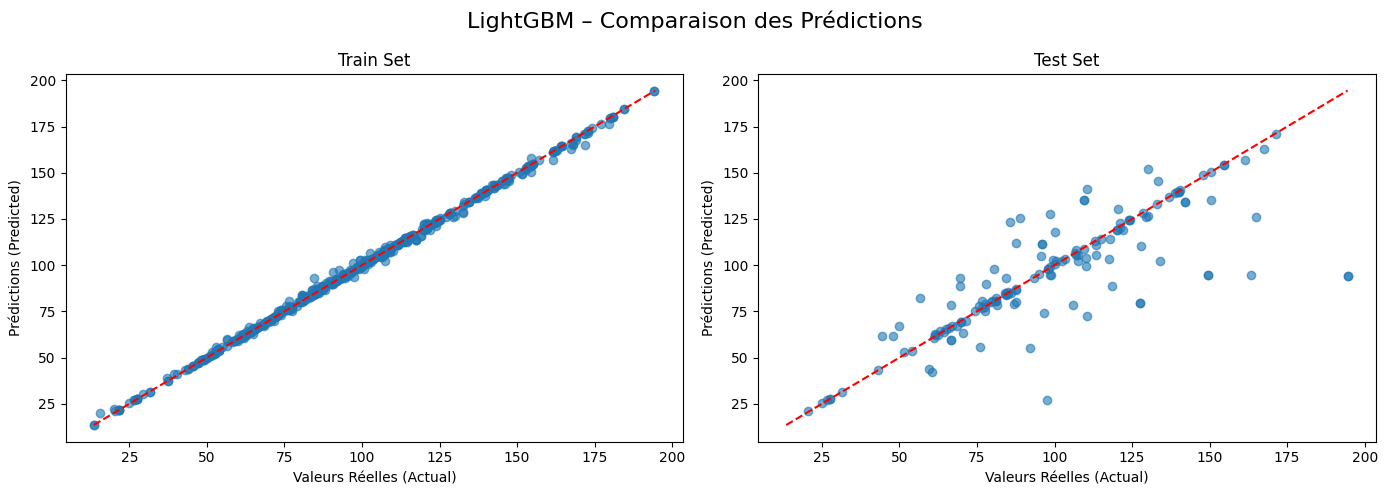

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test,CV_R2_mean,CV_R2_std
0,LightGBM,0.998755,0.643714,1.271439,20.470007,0.718773,10.380902,0.59353,0.089983


In [270]:
models = [
    (lgb_model, "LightGBM")
]

results = []

for model, name in models:
    print(f"\nTraining {name}...\n")
    res = evaluate_regression(model, name)
    evaluate_model(model, name)
    results.append(res)

result_df = pd.DataFrame(results)
result_df.sort_values(by="R2_test", ascending=False)
result_df


Training CatBoost...
Skipping re-fit for CatBoost (already trained).
Using CatBoost native CV...
Training on fold [0/5]

bestTest = 21.45170789
bestIteration = 612

Training on fold [1/5]

bestTest = 23.32794593
bestIteration = 796

Training on fold [2/5]

bestTest = 21.72259037
bestIteration = 799

Training on fold [3/5]

bestTest = 22.84132836
bestIteration = 799

Training on fold [4/5]

bestTest = 20.57196887
bestIteration = 797

Skipping re-fit for CatBoost (already trained).
--- CatBoost ---
 Train R² : 0.923 | RMSE: 10.0 | MAE: 7.0
 Test  R² : 0.671 | RMSE: 19.7 | MAE: 12.4




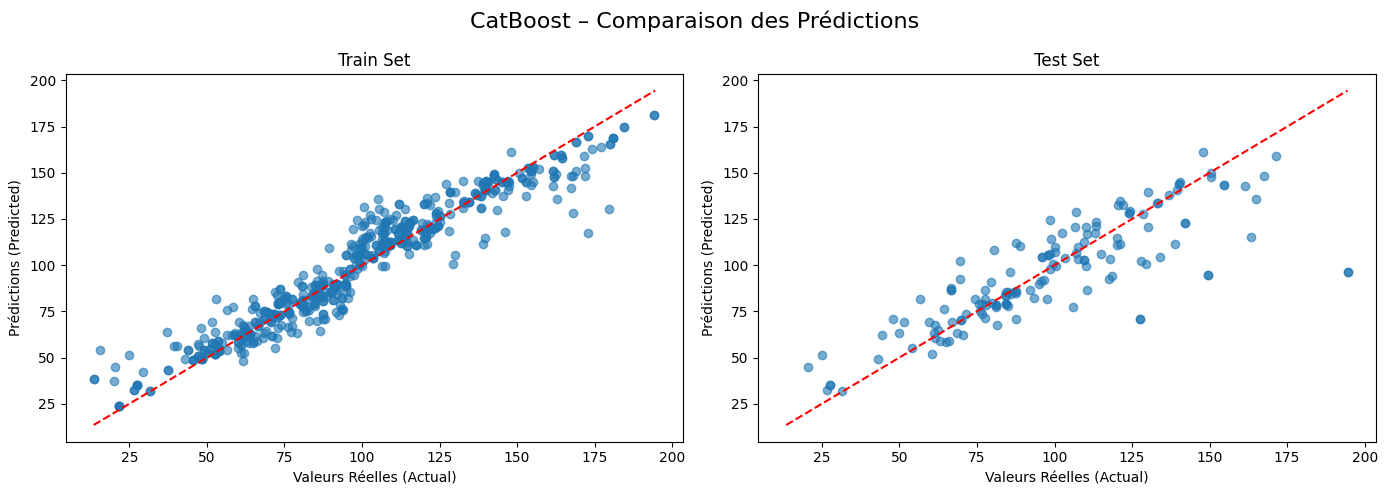

Training LightGBM...
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 19
[LightGBM] [Info] Start training from score 98.731164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

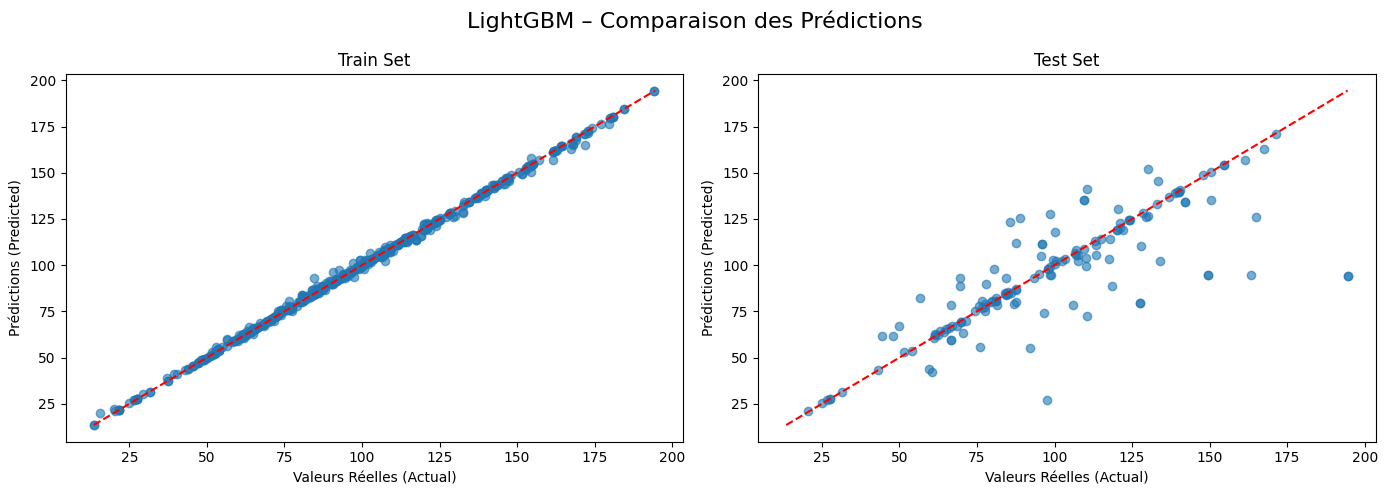

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test,CV_R2_mean,CV_R2_std
0,CatBoost,0.922916,0.671226,10.003952,19.663790,7.049974,12.355938,22.00192,1.097686
1,LightGBM,0.998755,0.643714,1.271439,20.470007,0.718773,10.380902,0.59353,0.089983


In [271]:
models = [
    (cat_model, "CatBoost"),
    (lgb_model, "LightGBM")
]


results = []

for model, name in models:
    print(f"Training {name}...")
    res = evaluate_regression(model, name)
    evaluate_model(model, name)
    results.append(res)

result_df = pd.DataFrame(results)
result_df.sort_values(by="R2_test", ascending=False)
result_df